In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [23]:
df=pd.read_csv("bike_buyers_clean.csv")

In [3]:
bic.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [4]:
bic.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19965.992000,56140.000000,1.908000,1.452000,44.190000
std,5347.333948,31081.609779,1.626094,1.124705,11.353537
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [7]:
korelacija = bic[['Income', 'Age','Children','Cars']].corr()
print(korelacija)

            Income       Age  Children      Cars
Income    1.000000  0.169128  0.258558  0.447695
Age       0.169128  1.000000  0.530621  0.190577
Children  0.258558  0.530621  1.000000  0.273985
Cars      0.447695  0.190577  0.273985  1.000000


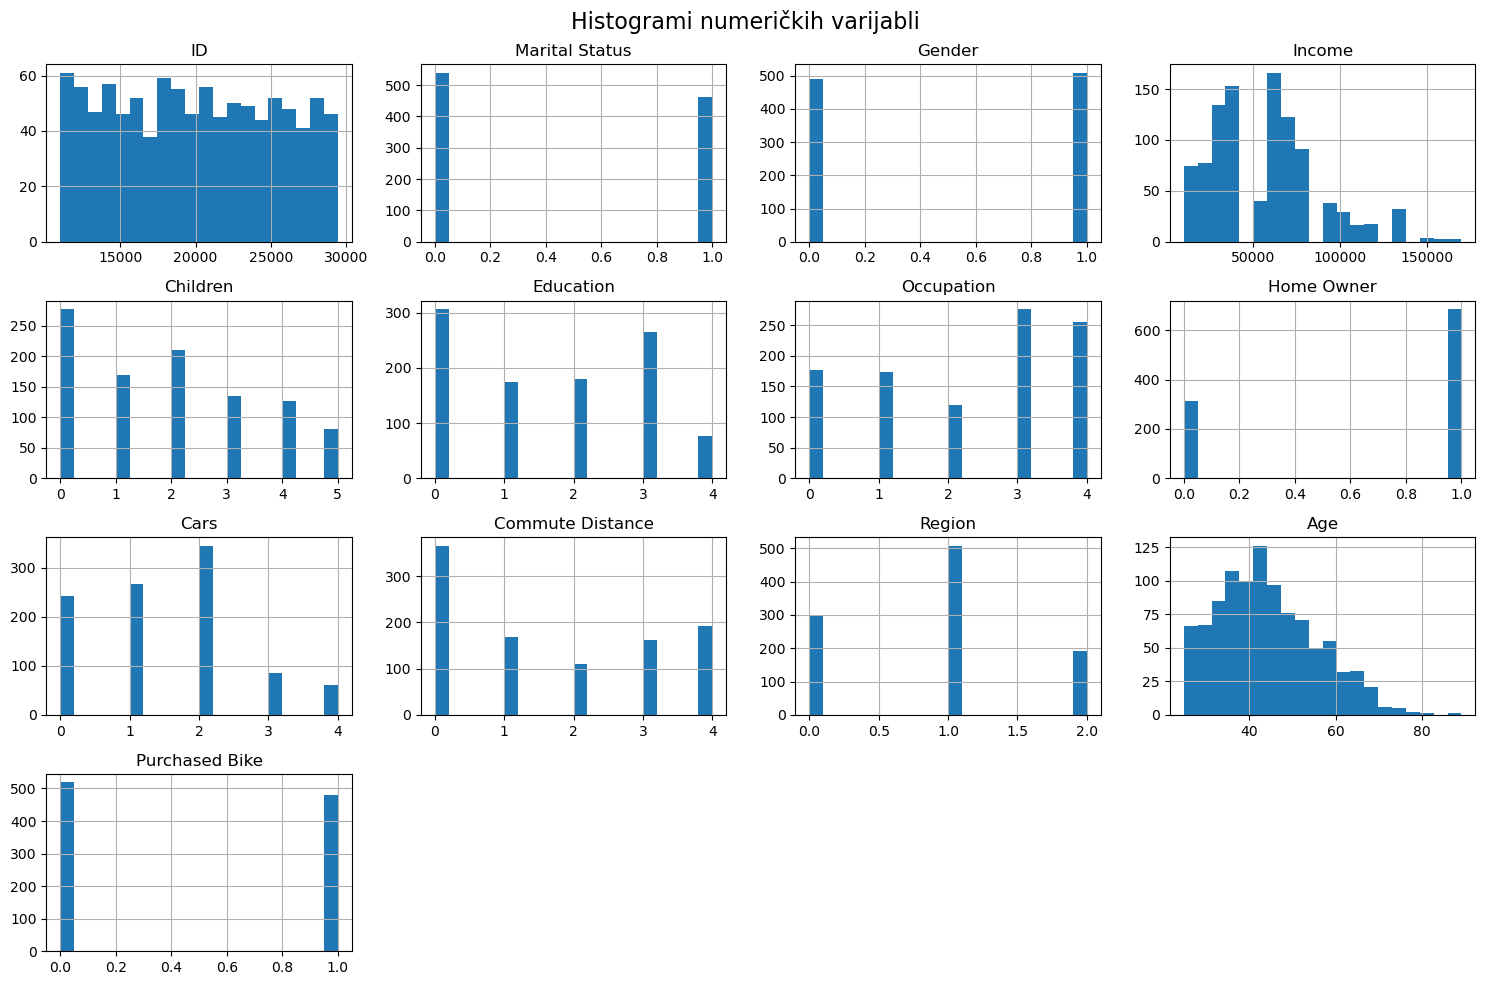

In [24]:
# Pretvori sve tekstualne stupce u numeričke (kategorijske kodove)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category').cat.codes

# Prikaz histograma svih numeričkih varijabli
df.hist(figsize=(15, 10), bins=20)
plt.suptitle('Histogrami numeričkih varijabli', fontsize=16)
plt.tight_layout()
plt.show()

In [32]:
bic["Purchased Bike_num"] = bic["Purchased Bike"].apply(lambda x: 1 if x == "Yes" else 0)

In [33]:
bic.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Purchased Bike_num
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No,0
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No,0
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No,0
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes,1
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes,1


In [34]:
korelacija = bic[['Income', 'Age','Children','Cars',"Purchased Bike_num"]].corr()
print(korelacija)

                      Income       Age  Children      Cars  Purchased Bike_num
Income              1.000000  0.169128  0.258558  0.447695            0.042306
Age                 0.169128  1.000000  0.530621  0.190577           -0.106068
Children            0.258558  0.530621  1.000000  0.273985           -0.121603
Cars                0.447695  0.190577  0.273985  1.000000           -0.201921
Purchased Bike_num  0.042306 -0.106068 -0.121603 -0.201921            1.000000


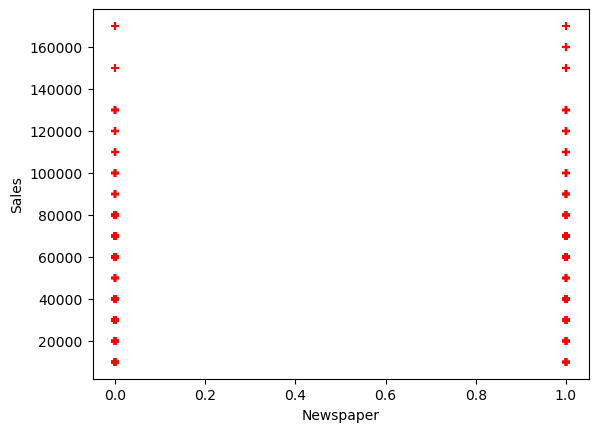

In [39]:
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.scatter(bic["Purchased Bike_num"],bic.Income, color='red', marker='+')

In [40]:
bicikli=bic

{'whiskers': [<matplotlib.lines.Line2D at 0x1fd36f121b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fd36a180b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fd369cc6b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fd36a184d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fd36a18710>],
 'means': []}

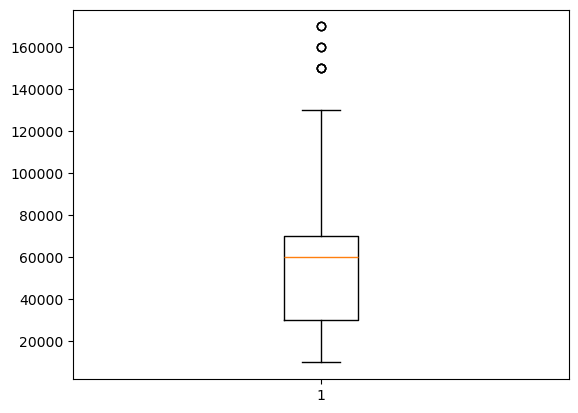

In [41]:
plt.boxplot(bicikli["Income"])

Text(0.5, 0.98, '')

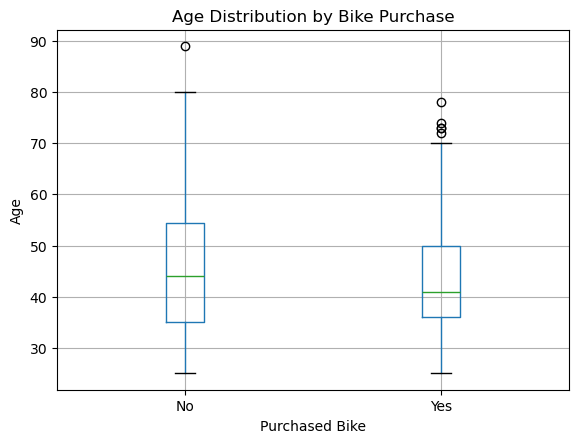

In [42]:
bicikli.boxplot(column='Age', by='Purchased Bike')
plt.xlabel('Purchased Bike')
plt.ylabel('Age')
plt.title('Age Distribution by Bike Purchase')
plt.suptitle('')